<a href="https://colab.research.google.com/github/ChickenRob0t/Hodking-Huxley-Model/blob/main/Implementaci%C3%B3n_H_H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
#Condiciones iniciales que se proveen del trabajo experimental de X.J Wang


V0=-65     #Potencial de Reposo o de Nernst


vL = -65    #Potencial de reposo para el canal de fuga
vK = -80    #Potencial de reposo para el canal de potasio
vNa = 55    #Potencial de reposo para el canal de sodio


gk=18       #Valor inicial de las conductancias de cada canal iónico
gna=45
gl=0.1    


n0 = 0.1     #Valores iniciales de las puertas de activación
m0 = 0.1
h0 = 0.9


Cm=0.01     #Valor de capacitancia de la membrana

In [ ]:
#Corriente externa, podemos cambiarle aquí los intérvalos para modificar la corriente administrada

def C_ext(t):
    if t>=0.0 and t<5:
        return -15
    elif t<20:
        return -10
    elif t<30:
      return 10
    elif t<40:
        return 10
    else:
        return 10

In [ ]:
def hiv(x,t):
  
  #Condiciones iniciales
  V=x[0]
  n=x[1]
  m=x[2]
  h=x[3]            


 #Cada canal toma un valor de la puerta de activación dependiendo el voltaje:

  #Para el canal de activación n
  if (abs(V+55)>1e-5):
            #alpha = (0.01*(V+55)) / (1-exp(-0.1*(V+55)))
    a_n = (0.01*(V+55)) / (1-np.exp(-0.1*(V+55)))
  else:
      # Para divisiones entre 0 que dé 0.1
    a_n = 0.1

  bn = 0.125*np.exp(-0.0125*(V+65))

  tau_n = 1 / (a_n + bn)
  an = a_n *tau_n
  
  
  
  #Para el canal de activación m
  if (abs(V+40)>1e-5):
    a_m = (0.1*(V+40)) / (1 - np.exp(-0.1*(V+40)) )
  else:
    # Divisiones entre 0 que nos dé 0.1
    a_m = 0.1
  ####

  bm = 4*np.exp(-0.0556*(V+65))

  ta_m= 1/ (a_m + bm)
  am=a_m*ta_m
  

 
  #Para los canales de inactivación h
  bh = 1 / ( 1 + np.exp(-0.1*(V+35)) )
  a_h = 0.07*np.exp(-0.05*(V+65))
  
  ta_h=1/(a_h+bh)
  ah=a_h*ta_h



  #Corriente producida por los 3 canales iónicos más la corriente externa     
  I_tot= -gl*(V-vL)-gk*n**4 *(V-vK) -gna* m**3 * h*(V-vNa) + C_ext(t)


  #Ecuaciones diferenciales del sistema
  dVdt=I_tot/Cm 
  dndt=(an-n)/tau_n
  dmdt=(am-m)/ta_m
  dhdt=(ah-h)/ta_h
  
  

  return [dVdt,dndt, dmdt,dhdt]
  


In [ ]:
#Aquí se resuelven las ecuaciones diferenciales que se escribieron en la función hiv
x0=[V0,n0,m0,h0]
t=np.linspace(0,80,1000)
x=odeint(hiv,x0,t)


# Gráficas 

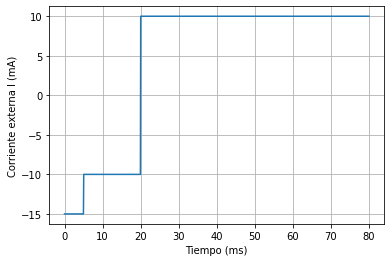

In [ ]:
#Corriente externa suministrada en función del tiempo

C_a=[C_ext(tt) for tt in t]

plt.figure()
plt.plot(t, C_a); plt.grid(True);
plt.xlabel('Tiempo (ms)')
plt.ylabel('Corriente externa I (mA)')
plt.savefig('C2.png',dpi=200)

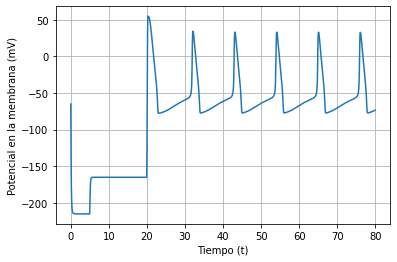

In [ ]:
#Voltaje de la membrana en función del tiempo
plt.plot(t,x[:,0])
plt.grid()
plt.ylabel('Potencial en la membrana (mV)')
plt.xlabel('Tiempo (t)')
plt.savefig('V2.png',dpi=200)

Text(0.5, 0, 'Tiempo (t)')

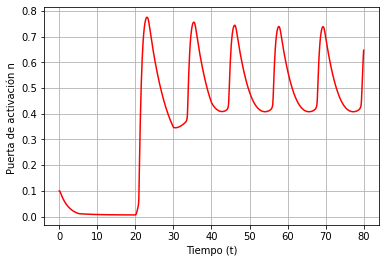

In [ ]:
#Puerta de activación n
plt.plot(t,x[:,1], color='r')
plt.grid()
plt.ylabel('Puerta de activación n ')
plt.xlabel('Tiempo (t)')

Text(0.5, 0, 'Tiempo (t)')

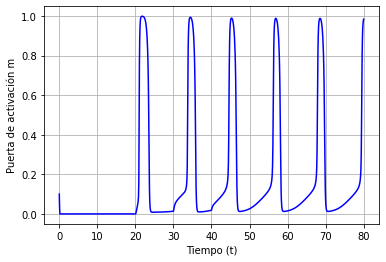

In [ ]:
#Puerta de activación m
plt.plot(t,x[:,2], color='b')
plt.grid()
plt.ylabel('Puerta de activación m')
plt.xlabel('Tiempo (t)')


Text(0.5, 0, 'Tiempo (t)')

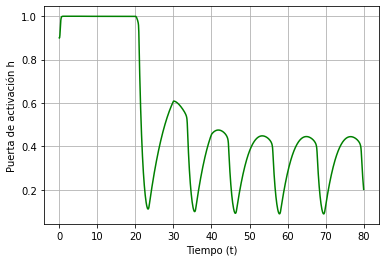

In [ ]:
#Puerta de activación h
plt.plot(t,x[:,3],color='g')
plt.grid()
plt.ylabel('Puerta de activación h')
plt.xlabel('Tiempo (t)')

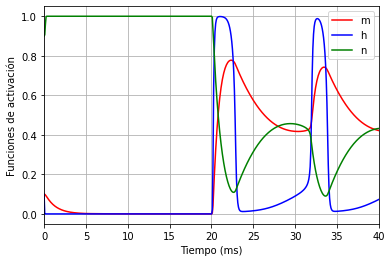

In [ ]:
#Ahora el comportamiento de las 3 a lo largo del tiempo
plt.plot(t, x[:,1],color='r')
plt.plot(t, x[:,2],color='b')
plt.plot(t, x[:,3],color='g')
plt.grid('on');
ax = plt.gca()
ax.set_xlim(0, 40);

plt.xlabel('Tiempo (ms)')
plt.ylabel('Funciones de activación')
plt.legend(('m','h','n'))
plt.savefig('activ2.png',dpi=200)

# Extra

*Si se quiere ver como funcionan las puertas de activación con respecto al voltaje, aquí está*

In [ ]:
#Definimos las funciones de las puertas de activación según el trabajo de Wang Buszaki
def n(V):
  if (abs(V+55)>1e-5):
    
    a_n = (0.01*(V+55)) / (1-np.exp(-0.1*(V+55)))
  else:
      # Para divisiones entre 0 que dé 0.1
    a_n = 0.1

  bn = 0.125*np.exp(-0.0125*(V+65))

  tau_n = 1 / (a_n + bn)
  an = a_n *tau_n
  return an
  
  
  
def m(V):
  if (abs(V+40)>1e-5):
    a_m = (0.1*(V+40)) / (1 - np.exp(-0.1*(V+40)) )
  else:
    # Divisiones entre 0 que nos dé 0.1
    a_m = 1.0

  bm = 4*np.exp(-0.0556*(V+65))

  ta_m= 1/ (a_m + bm)
  am=a_m*ta_m
  return am


  
def h(V):
  bh = 1 / ( 1 + np.exp(-0.1*(V+35)) )
  a_h = 0.07*np.exp(-0.05*(V+65))
  
  ta_h=1/(a_h+bh)
  ah=a_h*ta_h
  return ah

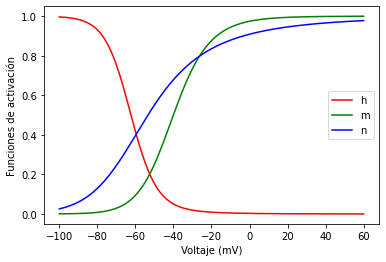

In [ ]:
#Funciones de activación a diferentes voltajes
V=np.linspace(-100,60,200)
h=plt.plot(V,[h(v) for v in V],color='r')
m=plt.plot(V,[m(v) for v in V],color='g')
n=plt.plot(V,[n(v) for v in V],color='b')
plt.xlabel('Voltaje (mV)')
plt.ylabel('Funciones de activación')
plt.legend(('h','m','n'))